# Feature Selection

This notebook includes:
* Feature Variance
* ANOVA
* Mutual Info
* Feature Importances
* Permutation Importances

## Imports and Global Settings

In [1]:
import time
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
sns.set_theme(style="whitegrid")

## Helper Functions

In [2]:
def show_values_on_bars(axs, h_v="h", space=0.5):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() / 1.6
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## Loading Data

In [3]:
start = time.perf_counter()

In [4]:
# EC2
# filepath_prefix = "/home/ubuntu/"
# Local

filepath_prefix = "/home/jeff/Documents/Data_Science_Projects/Yelp_Reviews/data/full_data/model_ready/"

In [5]:
train_records_to_load = 1000000
test_records_to_load = 1000

In [6]:
datatypes = {'target_reg': 'int16',
 'review_stars': 'int16',
 'NB_prob': 'float32',
 'svm_pred': 'float32',
 'ft_prob': 'float32',
 'lda_t1': 'float32',
 'lda_t2': 'float32',
 'lda_t3': 'float32',
 'lda_t4': 'float32',
 'lda_t5': 'float32',
 'grade_level': 'float32',
 'polarity': 'float32',
 'subjectivity': 'float32',
 'word_cnt': 'int16',
 'character_cnt': 'int16',
 'num_cnt': 'int16',
 'uppercase_cnt': 'int16',
 '#@_cnt': 'int16',
 'sentence_cnt': 'int16',
 'lexicon_cnt': 'int16',
 'syllable_cnt': 'int16',
 'avg_word_len': 'float32',
 'token_cnt': 'int16',
 'stopword_cnt': 'int16',
 'stopword_pct': 'float32',
 'ent_cnt': 'int16',
 'ent_pct': 'float32',
 'pos_adj_pct': 'float32',
 'pos_adj_cnt': 'int16',
 'pos_adp_pct': 'float32',
 'pos_adp_cnt': 'int16',
 'pos_adv_pct': 'float32',
 'pos_adv_cnt': 'int16',
 'pos_aux_pct': 'float32',
 'pos_aux_cnt': 'int16',
 'pos_conj_pct': 'float32',
 'pos_conj_cnt': 'int16',
 'pos_det_pct': 'float32',
 'pos_det_cnt': 'int16',
 'pos_intj_pct': 'float32',
 'pos_intj_cnt': 'int16',
 'pos_noun_pct': 'float32',
 'pos_noun_cnt': 'int16',
 'pos_num_pct': 'float32',
 'pos_num_cnt': 'int16',
 'pos_part_pct': 'float32',
 'pos_part_cnt': 'int16',
 'pos_pron_pct': 'float32',
 'pos_pron_cnt': 'int16',
 'pos_propn_pct': 'float32',
 'pos_propn_cnt': 'int16',
 'pos_punct_pct': 'float32',
 'pos_punct_cnt': 'int16',
 'pos_sconj_pct': 'float32',
 'pos_sconj_cnt': 'int16',
 'pos_sym_pct': 'float32',
 'pos_sym_cnt': 'int16',
 'pos_verb_pct': 'float32',
 'pos_verb_cnt': 'int16',
 'pos_x_pct': 'float32',
 'pos_x_cnt': 'int16',
 'dep_root_pct': 'float32',
 'dep_root_cnt': 'int16',
 'dep_acl_pct': 'float32',
 'dep_acl_cnt': 'int16',
 'dep_acomp_pct': 'float32',
 'dep_acomp_cnt': 'int16',
 'dep_advcl_pct': 'float32',
 'dep_advcl_cnt': 'int16',
 'dep_advmod_pct': 'float32',
 'dep_advmod_cnt': 'int16',
 'dep_agent_pct': 'float32',
 'dep_agent_cnt': 'int16',
 'dep_amod_pct': 'float32',
 'dep_amod_cnt': 'int16',
 'dep_appos_pct': 'float32',
 'dep_appos_cnt': 'int16',
 'dep_attr_pct': 'float32',
 'dep_attr_cnt': 'int16',
 'dep_aux_pct': 'float32',
 'dep_aux_cnt': 'int16',
 'dep_auxpass_pct': 'float32',
 'dep_auxpass_cnt': 'int16',
 'dep_case_pct': 'float32',
 'dep_case_cnt': 'int16',
 'dep_cc_pct': 'float32',
 'dep_cc_cnt': 'int16',
 'dep_ccomp_pct': 'float32',
 'dep_ccomp_cnt': 'int16',
 'dep_compound_pct': 'float32',
 'dep_compound_cnt': 'int16',
 'dep_conj_pct': 'float32',
 'dep_conj_cnt': 'int16',
 'dep_csubj_pct': 'float32',
 'dep_csubj_cnt': 'int16',
 'dep_csubjpass_pct': 'float32',
 'dep_csubjpass_cnt': 'int16',
 'dep_dative_pct': 'float32',
 'dep_dative_cnt': 'int16',
 'dep_dep_pct': 'float32',
 'dep_dep_cnt': 'int16',
 'dep_det_pct': 'float32',
 'dep_det_cnt': 'int16',
 'dep_dobj_pct': 'float32',
 'dep_dobj_cnt': 'int16',
 'dep_expl_pct': 'float32',
 'dep_expl_cnt': 'int16',
 'dep_intj_pct': 'float32',
 'dep_intj_cnt': 'int16',
 'dep_mark_pct': 'float32',
 'dep_mark_cnt': 'int16',
 'dep_meta_pct': 'float32',
 'dep_meta_cnt': 'int16',
 'dep_neg_pct': 'float32',
 'dep_neg_cnt': 'int16',
 'dep_nmod_pct': 'float32',
 'dep_nmod_cnt': 'int16',
 'dep_npadvmod_pct': 'float32',
 'dep_npadvmod_cnt': 'int16',
 'dep_nsubj_pct': 'float32',
 'dep_nsubj_cnt': 'int16',
 'dep_nsubjpass_pct': 'float32',
 'dep_nsubjpass_cnt': 'int16',
 'dep_nummod_pct': 'float32',
 'dep_nummod_cnt': 'int16',
 'dep_oprd_pct': 'float32',
 'dep_oprd_cnt': 'int16',
 'dep_parataxis_pct': 'float32',
 'dep_parataxis_cnt': 'int16',
 'dep_pcomp_pct': 'float32',
 'dep_pcomp_cnt': 'int16',
 'dep_pobj_pct': 'float32',
 'dep_pobj_cnt': 'int16',
 'dep_poss_pct': 'float32',
 'dep_poss_cnt': 'int16',
 'dep_preconj_pct': 'float32',
 'dep_preconj_cnt': 'int16',
 'dep_predet_pct': 'float32',
 'dep_predet_cnt': 'int16',
 'dep_prep_pct': 'float32',
 'dep_prep_cnt': 'int16',
 'dep_prt_pct': 'float32',
 'dep_prt_cnt': 'int16',
 'dep_punct_pct': 'float32',
 'dep_punct_cnt': 'int16',
 'dep_quantmod_pct': 'float32',
 'dep_quantmod_cnt': 'int16',
 'dep_relcl_pct': 'float32',
 'dep_relcl_cnt': 'int16',
 'dep_xcomp_pct': 'float32',
 'dep_xcomp_cnt': 'int16',
 'ent_cardinal_pct': 'float32',
 'ent_cardinal_cnt': 'int16',
 'ent_date_pct': 'float32',
 'ent_date_cnt': 'int16',
 'ent_event_pct': 'float32',
 'ent_event_cnt': 'int16',
 'ent_fac_pct': 'float32',
 'ent_fac_cnt': 'int16',
 'ent_gpe_pct': 'float32',
 'ent_gpe_cnt': 'int16',
 'ent_language_pct': 'float32',
 'ent_language_cnt': 'int16',
 'ent_law_pct': 'float32',
 'ent_law_cnt': 'int16',
 'ent_loc_pct': 'float32',
 'ent_loc_cnt': 'int16',
 'ent_money_pct': 'float32',
 'ent_money_cnt': 'int16',
 'ent_norp_pct': 'float32',
 'ent_norp_cnt': 'int16',
 'ent_ordinal_pct': 'float32',
 'ent_ordinal_cnt': 'int16',
 'ent_org_pct': 'float32',
 'ent_org_cnt': 'int16',
 'ent_percent_pct': 'float32',
 'ent_percent_cnt': 'int16',
 'ent_person_pct': 'float32',
 'ent_person_cnt': 'int16',
 'ent_product_pct': 'float32',
 'ent_product_cnt': 'int16',
 'ent_quantity_pct': 'float32',
 'ent_quantity_cnt': 'int16',
 'ent_time_pct': 'float32',
 'ent_time_cnt': 'int16',
 'ent_work_of_art_pct': 'float32',
 'ent_work_of_art_cnt': 'int16'}

In [7]:
train = pd.read_csv(f"{filepath_prefix}train.csv", nrows=train_records_to_load,
                    true_values=["True"], false_values=["False"], dtype=datatypes)
test = pd.read_csv(f"{filepath_prefix}test.csv", nrows=test_records_to_load,
                   true_values=["True"], false_values=["False"], dtype=datatypes)

In [8]:
end = time.perf_counter()

print("\nData Load Complete")
print(f"Took {(end-start):.2f} seconds")
print(f"Train Shape: {train.shape}")
print(f"Test Shape: {test.shape}")


Data Load Complete
Took 12.23 seconds
Train Shape: (1000000, 189)
Test Shape: (1000, 189)


In [9]:
X_train = train.drop(columns=['review_id', 'target_clf', 'target_reg'])
X_test = test.drop(columns=['review_id', 'target_clf', 'target_reg'])
y_train = train['target_clf']
y_test = test['target_clf']

In [10]:
print("\nData Split Complete")
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")


Data Split Complete
X_train Shape: (1000000, 186)
X_test Shape: (1000, 186)
y_train Shape: (1000000,)
y_test Shape: (1000,)


## Basic Overview

In [11]:
train.head(5)

,review_id,target_clf,target_reg,review_stars,nb_prob,svm_pred,ft_prob,lda_t1,lda_t2,lda_t3,lda_t4,lda_t5,grade_level,polarity,subjectivity,word_cnt,character_cnt,num_cnt,uppercase_cnt,#@_cnt,sentence_cnt,lexicon_cnt,syllable_cnt,avg_word_len,token_cnt,stopword_cnt,stopword_pct,ent_cnt,ent_pct,pos_adj_pct,pos_adj_cnt,pos_adp_pct,pos_adp_cnt,pos_adv_pct,pos_adv_cnt,pos_aux_pct,pos_aux_cnt,pos_conj_pct,pos_conj_cnt,pos_det_pct,pos_det_cnt,pos_intj_pct,pos_intj_cnt,pos_noun_pct,pos_noun_cnt,pos_num_pct,pos_num_cnt,pos_part_pct,pos_part_cnt,pos_pron_pct,pos_pron_cnt,pos_propn_pct,pos_propn_cnt,pos_punct_pct,pos_punct_cnt,pos_sconj_pct,pos_sconj_cnt,pos_sym_pct,pos_sym_cnt,pos_verb_pct,pos_verb_cnt,pos_x_pct,pos_x_cnt,dep_root_pct,dep_root_cnt,dep_acl_pct,dep_acl_cnt,dep_acomp_pct,dep_acomp_cnt,dep_advcl_pct,dep_advcl_cnt,dep_advmod_pct,dep_advmod_cnt,dep_agent_pct,dep_agent_cnt,dep_amod_pct,dep_amod_cnt,dep_appos_pct,dep_appos_cnt,dep_attr_pct,dep_attr_cnt,dep_aux_pct,dep_aux_cnt,dep_auxpass_pct,dep_auxpass_cnt,dep_case_pct,dep_case_cnt,dep_cc_pct,dep_cc_cnt,dep_ccomp_pct,dep_ccomp_cnt,dep_compound_pct,dep_compound_cnt,dep_conj_pct,dep_conj_cnt,dep_csubj_pct,dep_csubj_cnt,dep_csubjpass_pct,dep_csubjpass_cnt,dep_dative_pct,dep_dative_cnt,dep_dep_pct,dep_dep_cnt,dep_det_pct,dep_det_cnt,dep_dobj_pct,dep_dobj_cnt,dep_expl_pct,dep_expl_cnt,dep_intj_pct,dep_intj_cnt,dep_mark_pct,dep_mark_cnt,dep_meta_pct,dep_meta_cnt,dep_neg_pct,dep_neg_cnt,dep_nmod_pct,dep_nmod_cnt,dep_npadvmod_pct,dep_npadvmod_cnt,dep_nsubj_pct,dep_nsubj_cnt,dep_nsubjpass_pct,dep_nsubjpass_cnt,dep_nummod_pct,dep_nummod_cnt,dep_oprd_pct,dep_oprd_cnt,dep_parataxis_pct,dep_parataxis_cnt,dep_pcomp_pct,dep_pcomp_cnt,dep_pobj_pct,dep_pobj_cnt,dep_poss_pct,dep_poss_cnt,dep_preconj_pct,dep_preconj_cnt,dep_predet_pct,dep_predet_cnt,dep_prep_pct,dep_prep_cnt,dep_prt_pct,dep_prt_cnt,dep_punct_pct,dep_punct_cnt,dep_quantmod_pct,dep_quantmod_cnt,dep_relcl_pct,dep_relcl_cnt,dep_xcomp_pct,dep_xcomp_cnt,ent_cardinal_pct,ent_cardinal_cnt,ent_date_pct,ent_date_cnt,ent_event_pct,ent_event_cnt,ent_fac_pct,ent_fac_cnt,ent_gpe_pct,ent_gpe_cnt,ent_language_pct,ent_language_cnt,ent_law_pct,ent_law_cnt,ent_loc_pct,ent_loc_cnt,ent_money_pct,ent_money_cnt,ent_norp_pct,ent_norp_cnt,ent_ordinal_pct,ent_ordinal_cnt,ent_org_pct,ent_org_cnt,ent_percent_pct,ent_percent_cnt,ent_person_pct,ent_person_cnt,ent_product_pct,ent_product_cnt,ent_quantity_pct,ent_quantity_cnt,ent_time_pct,ent_time_cnt,ent_work_of_art_pct,ent_work_of_art_cnt
0,syrAB11Ayj0qb64M3orNyQ,False,0,4,0.00000,0.80500,0.78156,0.00490,0.00489,0.83379,0.15149,0.00493,12.10000,0.13819,0.58714,91,552,0,3,0,3,95,123,4.71875,129,51,0.39535,9,0.06977,0.10078,13,0.06202,8,0.05426,7,0.05426,7,0.00000,0,0.09302,12,0.00775,1,0.09302,12,0.00000,0,0.01550,2,0.07752,10,0.12403,16,0.16279,21,0.02326,3,0.00000,0,0.06977,9,0.00000,0,0.06977,9,0.00000,0,0.01550,2,0.00000,0,0.05426,7,0.00000,0,0.07752,10,0.01550,2,0.00775,1,0.02326,3,0.00000,0,0.01550,2,0.02326,3,0.02326,3,0.06977,9,0.04651,6,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.04651,6,0.02326,3,0.00000,0,0.00775,1,0.00775,1,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.06977,9,0.00000,0,0.00000,0,0.00000,0,0.00775,1,0.00000,0,0.06977,9,0.03101,4,0.00000,0,0.00000,0,0.08527,11,0.00000,0,0.16279,21,0.00000,0,0.00775,1,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00775,1,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.02326,3,0.00000,0,0.00000,0,0.00000,0,0.03876,5,0.00000,0,0.00000,0,0.00000,0,0.00000,0
1,ybCCcr1ICVynGJBx0lpBAw,False,0,4,0.88500,-0.35600,0.61055,0.00686,0.00729,0.97217,0.00684,0.00685,5.30000,0.44034,0.66364,57,338,0,0,0,5,56,80,4.94737,66,29,0.43939,2,0.03030,0.06061,4,0.07576,5,0.09091,6,0.09091,6,0.00000,0,0.10606,7,0.00000,0,0.18182,12,0.00000,0,0.00000,0,0.03030,2,0.06061,4,0.13636,9,0.03030,2,0.00000,0,0.12121,8,0.00000,0,0.09091,6,0.01515,1,0.03030,2,0.00000,0,0.09091,6,0.00000,0,0.04545,3,0.01515,1,0.00000,0,0.03030,2,0.03030,2,0.00000,0,0.01515,1,0.03030,2,0.04545,3,0.01515,1,0

In [12]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 189 columns):
 #    Column               Dtype  
---   ------               -----  
 0    review_id            object 
 1    target_clf           bool   
 2    target_reg           int16  
 3    review_stars         int16  
 4    nb_prob              float64
 5    svm_pred             float32
 6    ft_prob              float32
 7    lda_t1               float32
 8    lda_t2               float32
 9    lda_t3               float32
 10   lda_t4               float32
 11   lda_t5               float32
 12   grade_level          float32
 13   polarity             float32
 14   subjectivity         float32
 15   word_cnt             int16  
 16   character_cnt        int16  
 17   num_cnt              int16  
 18   uppercase_cnt        int16  
 19   #@_cnt               int16  
 20   sentence_cnt         int16  
 21   lexicon_cnt          int16  
 22   syllable_cnt         int16  
 23   avg_wo

In [13]:
train.describe()

,target_reg,review_stars,nb_prob,svm_pred,ft_prob,lda_t1,lda_t2,lda_t3,lda_t4,lda_t5,grade_level,polarity,subjectivity,word_cnt,character_cnt,num_cnt,uppercase_cnt,#@_cnt,sentence_cnt,lexicon_cnt,syllable_cnt,avg_word_len,token_cnt,stopword_cnt,stopword_pct,ent_cnt,ent_pct,pos_adj_pct,pos_adj_cnt,pos_adp_pct,pos_adp_cnt,pos_adv_pct,pos_adv_cnt,pos_aux_pct,pos_aux_cnt,pos_conj_pct,pos_conj_cnt,pos_det_pct,pos_det_cnt,pos_intj_pct,pos_intj_cnt,pos_noun_pct,pos_noun_cnt,pos_num_pct,pos_num_cnt,pos_part_pct,pos_part_cnt,pos_pron_pct,pos_pron_cnt,pos_propn_pct,pos_propn_cnt,pos_punct_pct,pos_punct_cnt,pos_sconj_pct,pos_sconj_cnt,pos_sym_pct,pos_sym_cnt,pos_verb_pct,pos_verb_cnt,pos_x_pct,pos_x_cnt,dep_root_pct,dep_root_cnt,dep_acl_pct,dep_acl_cnt,dep_acomp_pct,dep_acomp_cnt,dep_advcl_pct,dep_advcl_cnt,dep_advmod_pct,dep_advmod_cnt,dep_agent_pct,dep_agent_cnt,dep_amod_pct,dep_amod_cnt,dep_appos_pct,dep_appos_cnt,dep_attr_pct,dep_attr_cnt,dep_aux_pct,dep_aux_cnt,dep_auxpass_pct,dep_auxpass_cnt,dep_case_pct,dep_case_cnt,dep_cc_pct,dep_cc_cnt,dep_ccomp_pct,dep_ccomp_cnt,dep_compound_pct,dep_compound_cnt,dep_conj_pct,dep_conj_cnt,dep_csubj_pct,dep_csubj_cnt,dep_csubjpass_pct,dep_csubjpass_cnt,dep_dative_pct,dep_dative_cnt,dep_dep_pct,dep_dep_cnt,dep_det_pct,dep_det_cnt,dep_dobj_pct,dep_dobj_cnt,dep_expl_pct,dep_expl_cnt,dep_intj_pct,dep_intj_cnt,dep_mark_pct,dep_mark_cnt,dep_meta_pct,dep_meta_cnt,dep_neg_pct,dep_neg_cnt,dep_nmod_pct,dep_nmod_cnt,dep_npadvmod_pct,dep_npadvmod_cnt,dep_nsubj_pct,dep_nsubj_cnt,dep_nsubjpass_pct,dep_nsubjpass_cnt,dep_nummod_pct,dep_nummod_cnt,dep_oprd_pct,dep_oprd_cnt,dep_parataxis_pct,dep_parataxis_cnt,dep_pcomp_pct,dep_pcomp_cnt,dep_pobj_pct,dep_pobj_cnt,dep_poss_pct,dep_poss_cnt,dep_preconj_pct,dep_preconj_cnt,dep_predet_pct,dep_predet_cnt,dep_prep_pct,dep_prep_cnt,dep_prt_pct,dep_prt_cnt,dep_punct_pct,dep_punct_cnt,dep_quantmod_pct,dep_quantmod_cnt,dep_relcl_pct,dep_relcl_cnt,dep_xcomp_pct,dep_xcomp_cnt,ent_cardinal_pct,ent_cardinal_cnt,ent_date_pct,ent_date_cnt,ent_event_pct,ent_event_cnt,ent_fac_pct,ent_fac_cnt,ent_gpe_pct,ent_gpe_cnt,ent_language_pct,ent_language_cnt,ent_law_pct,ent_law_cnt,ent_loc_pct,ent_loc_cnt,ent_money_pct,ent_money_cnt,ent_norp_pct,ent_norp_cnt,ent_ordinal_pct,ent_ordinal_cnt,ent_org_pct,ent_org_cnt,ent_percent_pct,ent_percent_cnt,ent_person_pct,ent_person_cnt,ent_product_pct,ent_product_cnt,ent_quantity_pct,ent_quantity_cnt,ent_time_pct,ent_time_cnt,ent_work_of_art_pct,ent_work_of_art_cnt
count,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,1000000.00000,

## Scale Data

In [14]:
start = time.perf_counter()

In [15]:
standard_scaler = StandardScaler()
X_train_scaled = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(standard_scaler.transform(X_test), columns=X_test.columns)

In [16]:
end = time.perf_counter()

print("\nTrain and Test Data Scaled")
print(f"Preprocessing took {(end-start):.2f} seconds.")


Train and Test Data Scaled
Preprocessing took 3.19 seconds.


## Feature Groups

In [17]:
list(X_train.columns)

['review_stars',
 'nb_prob',
 'svm_pred',
 'ft_prob',
 'lda_t1',
 'lda_t2',
 'lda_t3',
 'lda_t4',
 'lda_t5',
 'grade_level',
 'polarity',
 'subjectivity',
 'word_cnt',
 'character_cnt',
 'num_cnt',
 'uppercase_cnt',
 '#@_cnt',
 'sentence_cnt',
 'lexicon_cnt',
 'syllable_cnt',
 'avg_word_len',
 'token_cnt',
 'stopword_cnt',
 'stopword_pct',
 'ent_cnt',
 'ent_pct',
 'pos_adj_pct',
 'pos_adj_cnt',
 'pos_adp_pct',
 'pos_adp_cnt',
 'pos_adv_pct',
 'pos_adv_cnt',
 'pos_aux_pct',
 'pos_aux_cnt',
 'pos_conj_pct',
 'pos_conj_cnt',
 'pos_det_pct',
 'pos_det_cnt',
 'pos_intj_pct',
 'pos_intj_cnt',
 'pos_noun_pct',
 'pos_noun_cnt',
 'pos_num_pct',
 'pos_num_cnt',
 'pos_part_pct',
 'pos_part_cnt',
 'pos_pron_pct',
 'pos_pron_cnt',
 'pos_propn_pct',
 'pos_propn_cnt',
 'pos_punct_pct',
 'pos_punct_cnt',
 'pos_sconj_pct',
 'pos_sconj_cnt',
 'pos_sym_pct',
 'pos_sym_cnt',
 'pos_verb_pct',
 'pos_verb_cnt',
 'pos_x_pct',
 'pos_x_cnt',
 'dep_root_pct',
 'dep_root_cnt',
 'dep_acl_pct',
 'dep_acl_cnt',
 'de

In [18]:
submodels = ['nb_prob', 'svm_pred', 'ft_prob', 'lda_t1', 'lda_t2', 'lda_t3', 'lda_t4', 'lda_t5']

other = ['review_stars', 'grade_level', 'polarity', 'subjectivity']

basic_text = ['word_cnt', 'character_cnt', 'num_cnt', 'uppercase_cnt',
              '#@_cnt', 'sentence_cnt', 'lexicon_cnt',
              'syllable_cnt', 'avg_word_len', 'token_cnt',
              'stopword_cnt', 'stopword_pct', 'ent_cnt', 'ent_pct']

spacy_linguistic = ['pos_adj_pct', 'pos_adj_cnt', 'pos_adp_pct', 'pos_adp_cnt', 'pos_adv_pct', 'pos_adv_cnt',
                    'pos_aux_pct', 'pos_aux_cnt', 'pos_conj_pct', 'pos_conj_cnt', 'pos_det_pct', 'pos_det_cnt',
                    'pos_intj_pct', 'pos_intj_cnt', 'pos_noun_pct', 'pos_noun_cnt', 'pos_num_pct',
                    'pos_num_cnt', 'pos_part_pct', 'pos_part_cnt', 'pos_pron_pct', 'pos_pron_cnt',
                    'pos_propn_pct', 'pos_propn_cnt', 'pos_punct_pct', 'pos_punct_cnt', 'pos_sconj_pct',
                    'pos_sconj_cnt', 'pos_sym_pct', 'pos_sym_cnt', 'pos_verb_pct', 'pos_verb_cnt', 'pos_x_pct',
                    'pos_x_cnt', 'dep_root_pct', 'dep_root_cnt', 'dep_acl_pct', 'dep_acl_cnt', 'dep_acomp_pct',
                    'dep_acomp_cnt', 'dep_advcl_pct', 'dep_advcl_cnt', 'dep_advmod_pct', 'dep_advmod_cnt',
                    'dep_agent_pct', 'dep_agent_cnt', 'dep_amod_pct', 'dep_amod_cnt', 'dep_appos_pct',
                    'dep_appos_cnt', 'dep_attr_pct', 'dep_attr_cnt', 'dep_aux_pct', 'dep_aux_cnt',
                    'dep_auxpass_pct', 'dep_auxpass_cnt', 'dep_case_pct', 'dep_case_cnt', 'dep_cc_pct',
                    'dep_cc_cnt', 'dep_ccomp_pct', 'dep_ccomp_cnt', 'dep_compound_pct', 'dep_compound_cnt',
                    'dep_conj_pct', 'dep_conj_cnt', 'dep_csubj_pct', 'dep_csubj_cnt', 'dep_csubjpass_pct',
                    'dep_csubjpass_cnt', 'dep_dative_pct', 'dep_dative_cnt', 'dep_dep_pct', 'dep_dep_cnt',
                    'dep_det_pct', 'dep_det_cnt', 'dep_dobj_pct', 'dep_dobj_cnt', 'dep_expl_pct',
                    'dep_expl_cnt', 'dep_intj_pct', 'dep_intj_cnt', 'dep_mark_pct', 'dep_mark_cnt',
                    'dep_meta_pct', 'dep_meta_cnt', 'dep_neg_pct', 'dep_neg_cnt', 'dep_nmod_pct',
                    'dep_nmod_cnt', 'dep_npadvmod_pct', 'dep_npadvmod_cnt', 'dep_nsubj_pct', 'dep_nsubj_cnt',
                    'dep_nsubjpass_pct', 'dep_nsubjpass_cnt', 'dep_nummod_pct', 'dep_nummod_cnt',
                    'dep_oprd_pct', 'dep_oprd_cnt', 'dep_parataxis_pct', 'dep_parataxis_cnt', 'dep_pcomp_pct',
                    'dep_pcomp_cnt', 'dep_pobj_pct', 'dep_pobj_cnt', 'dep_poss_pct', 'dep_poss_cnt',
                    'dep_preconj_pct', 'dep_preconj_cnt', 'dep_predet_pct', 'dep_predet_cnt', 'dep_prep_pct',
                    'dep_prep_cnt', 'dep_prt_pct', 'dep_prt_cnt', 'dep_punct_pct', 'dep_punct_cnt',
                    'dep_quantmod_pct', 'dep_quantmod_cnt', 'dep_relcl_pct', 'dep_relcl_cnt', 'dep_xcomp_pct',
                    'dep_xcomp_cnt', 'ent_cardinal_pct', 'ent_cardinal_cnt', 'ent_date_pct', 'ent_date_cnt',
                    'ent_event_pct', 'ent_event_cnt', 'ent_fac_pct', 'ent_fac_cnt', 'ent_gpe_pct',
                    'ent_gpe_cnt', 'ent_language_pct', 'ent_language_cnt', 'ent_law_pct', 'ent_law_cnt',
                    'ent_loc_pct', 'ent_loc_cnt', 'ent_money_pct', 'ent_money_cnt', 'ent_norp_pct',
                    'ent_norp_cnt', 'ent_ordinal_pct', 'ent_ordinal_cnt', 'ent_org_pct', 'ent_org_cnt',
                    'ent_percent_pct', 'ent_percent_cnt', 'ent_person_pct', 'ent_person_cnt',
                    'ent_product_pct', 'ent_product_cnt', 'ent_quantity_pct', 'ent_quantity_cnt',
                    'ent_time_pct', 'ent_time_cnt', 'ent_work_of_art_pct', 'ent_work_of_art_cnt']

## Univariate

### Feature Standard Deviation

In [19]:
sorted_std = X_train.std().sort_values(ascending=False)

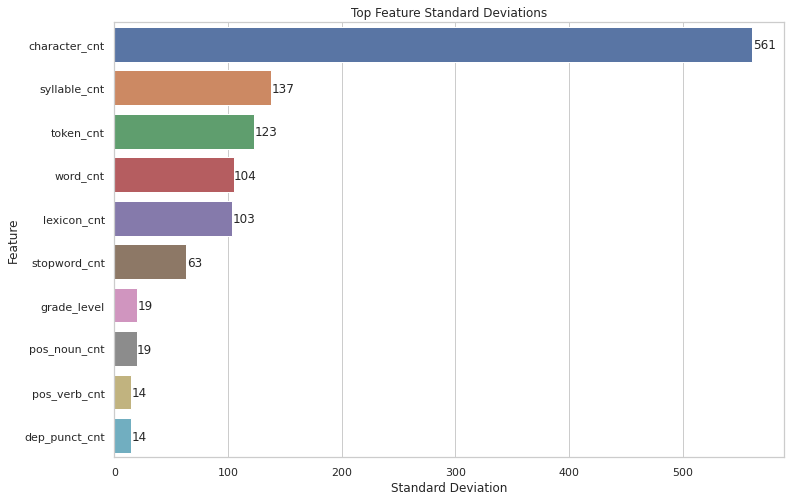

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=sorted_std[:10].values, y=sorted_std[:10].index, ax=ax)
ax.set_title("Top Feature Standard Deviations")
ax.set_ylabel("Feature")
ax.set_xlabel("Standard Deviation")
show_values_on_bars(ax)

In [21]:
sorted_std.iloc[-10:].index

Index(['dep_preconj_pct', 'ent_work_of_art_pct', 'ent_percent_pct',
       'dep_meta_pct', 'ent_event_pct', 'ent_language_pct', 'ent_law_pct',
       'dep_csubjpass_pct', 'pos_conj_cnt', 'pos_conj_pct'],
      dtype='object')

Text(0.5, 0, 'Standard Deviation')

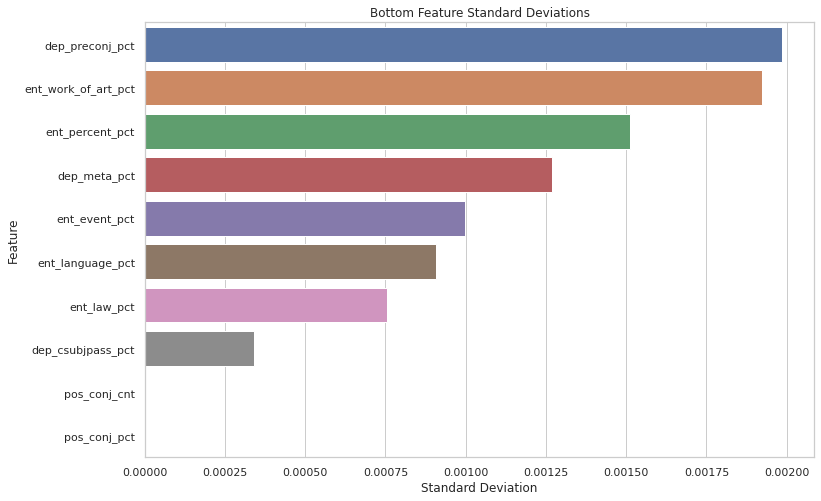

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=sorted_std.iloc[-10:].values, y=sorted_std.iloc[-10:].index, ax=ax)
ax.set_title("Bottom Feature Standard Deviations")
ax.set_ylabel("Feature")
ax.set_xlabel("Standard Deviation")
# show_values_on_bars(ax)

### ANOVA

In [23]:
anova_results = f_classif(X_train, y_train)
sorted_anova_f_stats = pd.Series(anova_results[0], index=X_train.columns).sort_values(ascending=False)
sorted_anova_f_stats

/home/jeff/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [34 35] are constant.
  UserWarning)
/home/jeff/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


svm_pred              140640.52952
ft_prob               131647.80025
nb_prob                75559.67010
token_cnt              75346.86646
character_cnt          73507.05479
lexicon_cnt            72865.35140
word_cnt               72253.31642
syllable_cnt           72115.86422
stopword_cnt           70928.43349
pos_noun_cnt           69911.51173
dep_prep_cnt           68510.12451
dep_pobj_cnt           68484.03651
pos_adp_cnt            68395.66803
dep_punct_cnt          68282.46138
pos_punct_cnt          67970.25662
pos_det_cnt            67121.17795
pos_verb_cnt           65336.93707
dep_nsubj_cnt          65091.27051
dep_det_cnt            64858.74155
dep_root_cnt           64450.69020
pos_aux_cnt            60696.96117
pos_pron_cnt           60112.60315
dep_dobj_cnt           59779.54273
pos_adv_cnt            59258.98358
dep_advmod_cnt         58464.80182
dep_aux_cnt            57169.42214
pos_part_cnt           55033.28087
pos_adj_cnt            54899.17283
dep_amod_cnt        

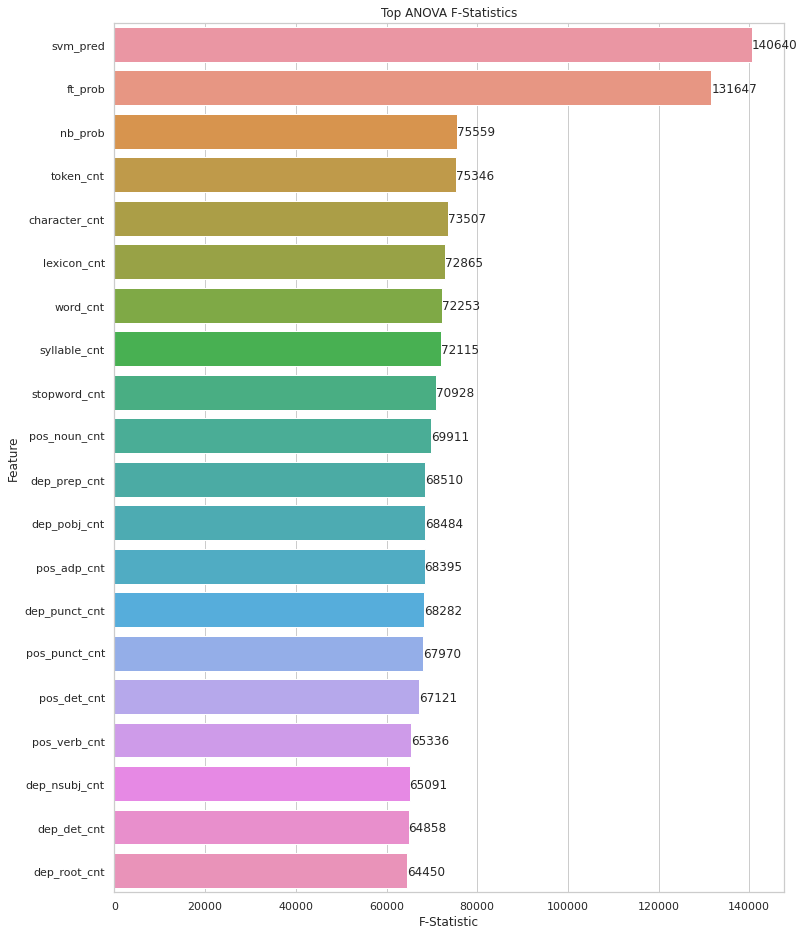

In [24]:
fig, ax = plt.subplots(figsize=(12,16))
sns.barplot(x=sorted_anova_f_stats.iloc[:20].values, y=sorted_anova_f_stats.iloc[:20].index, ax=ax)
ax.set_title("Top ANOVA F-Statistics")
ax.set_ylabel("Feature")
ax.set_xlabel("F-Statistic")
show_values_on_bars(ax)

### Mutual Info

In [25]:
mutual_info_results = mutual_info_classif(X_train, y_train)
sorted_mutual_info = pd.Series(mutual_info_results, index=X_train.columns).sort_values(ascending=False)
sorted_mutual_info

svm_pred              0.09245
ft_prob               0.06303
review_stars          0.05278
nb_prob               0.05089
token_cnt             0.04812
dep_punct_cnt         0.04735
pos_punct_cnt         0.04715
character_cnt         0.04699
word_cnt              0.04672
dep_pobj_cnt          0.04618
pos_adp_cnt           0.04594
syllable_cnt          0.04592
pos_verb_cnt          0.04588
lexicon_cnt           0.04585
stopword_cnt          0.04575
dep_prep_cnt          0.04547
pos_noun_cnt          0.04430
dep_root_cnt          0.04371
pos_det_cnt           0.04369
dep_nsubj_cnt         0.04284
dep_dobj_cnt          0.04247
dep_det_cnt           0.04233
pos_pron_cnt          0.04131
pos_part_cnt          0.04065
dep_aux_cnt           0.04039
pos_sconj_cnt         0.04026
pos_aux_cnt           0.03947
pos_adv_cnt           0.03939
lda_t1                0.03858
lda_t2                0.03825
dep_advcl_cnt         0.03812
dep_mark_cnt          0.03767
dep_advmod_cnt        0.03749
ent_cnt   

Text(0.5, 0, 'Mutual Info')

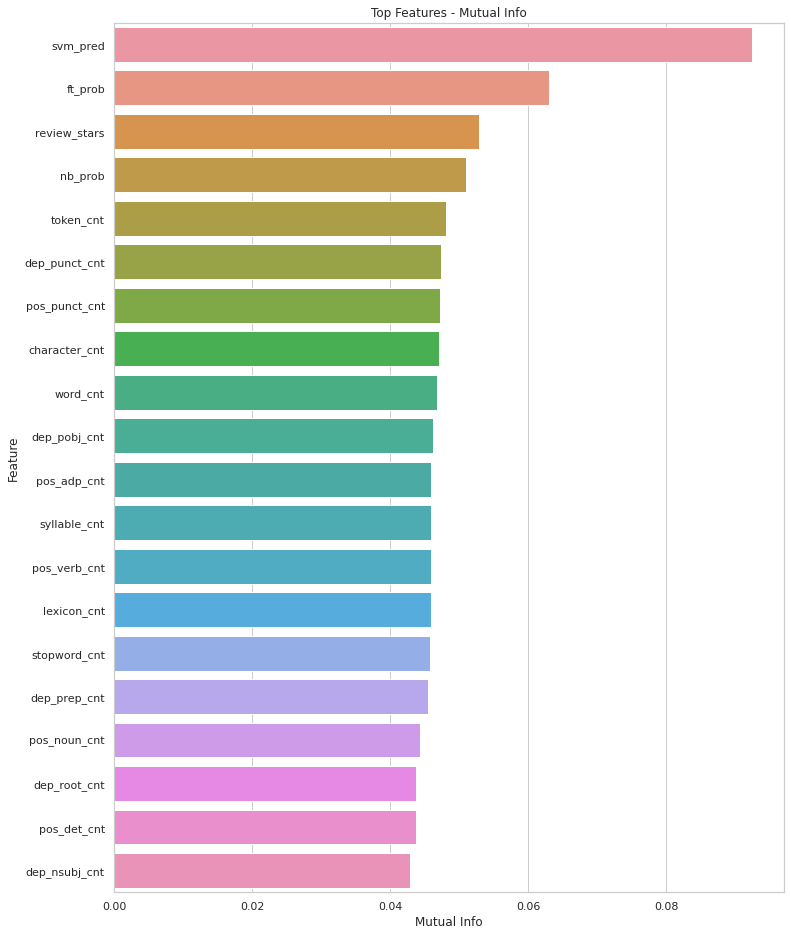

In [26]:
fig, ax = plt.subplots(figsize=(12,16))
sns.barplot(x=sorted_mutual_info.iloc[:20].values, y=sorted_mutual_info.iloc[:20].index, ax=ax)
ax.set_title("Top Features - Mutual Info")
ax.set_ylabel("Feature")
ax.set_xlabel("Mutual Info")
# show_values_on_bars(ax)

## Tree Based

### Feature Importances

In [27]:
forest = RandomForestClassifier(n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [28]:
feature_importances = pd.Series(forest.feature_importances_, index=X_train.columns)
feature_importances

review_stars          0.00453
nb_prob               0.02497
svm_pred              0.05631
ft_prob               0.03594
lda_t1                0.01161
lda_t2                0.01173
lda_t3                0.01185
lda_t4                0.01119
lda_t5                0.01175
grade_level           0.01112
polarity              0.01267
subjectivity          0.01177
word_cnt              0.01124
character_cnt         0.01631
num_cnt               0.00172
uppercase_cnt         0.00522
#@_cnt                0.00019
sentence_cnt          0.00507
lexicon_cnt           0.01128
syllable_cnt          0.01548
avg_word_len          0.01158
token_cnt             0.01344
stopword_cnt          0.01017
stopword_pct          0.01058
ent_cnt               0.00584
ent_pct               0.00882
pos_adj_pct           0.01086
pos_adj_cnt           0.00681
pos_adp_pct           0.00967
pos_adp_cnt           0.00624
pos_adv_pct           0.01001
pos_adv_cnt           0.00569
pos_aux_pct           0.01022
pos_aux_cn

In [29]:
sorted_fi = feature_importances.sort_values(ascending=False)
sorted_fi

svm_pred              0.05631
ft_prob               0.03594
nb_prob               0.02497
character_cnt         0.01631
syllable_cnt          0.01548
token_cnt             0.01344
polarity              0.01267
lda_t3                0.01185
subjectivity          0.01177
lda_t5                0.01175
lda_t2                0.01173
lda_t1                0.01161
avg_word_len          0.01158
lexicon_cnt           0.01128
word_cnt              0.01124
lda_t4                0.01119
grade_level           0.01112
pos_adj_pct           0.01086
dep_root_pct          0.01074
pos_noun_pct          0.01072
stopword_pct          0.01058
pos_det_pct           0.01046
pos_verb_pct          0.01037
dep_det_pct           0.01034
dep_nsubj_pct         0.01025
pos_aux_pct           0.01022
stopword_cnt          0.01017
dep_amod_pct          0.01006
pos_adv_pct           0.01001
dep_advmod_pct        0.00998
dep_punct_cnt         0.00996
pos_punct_pct         0.00996
dep_dobj_pct          0.00995
dep_cc_pct

Text(0.5, 0, 'Importance Score')

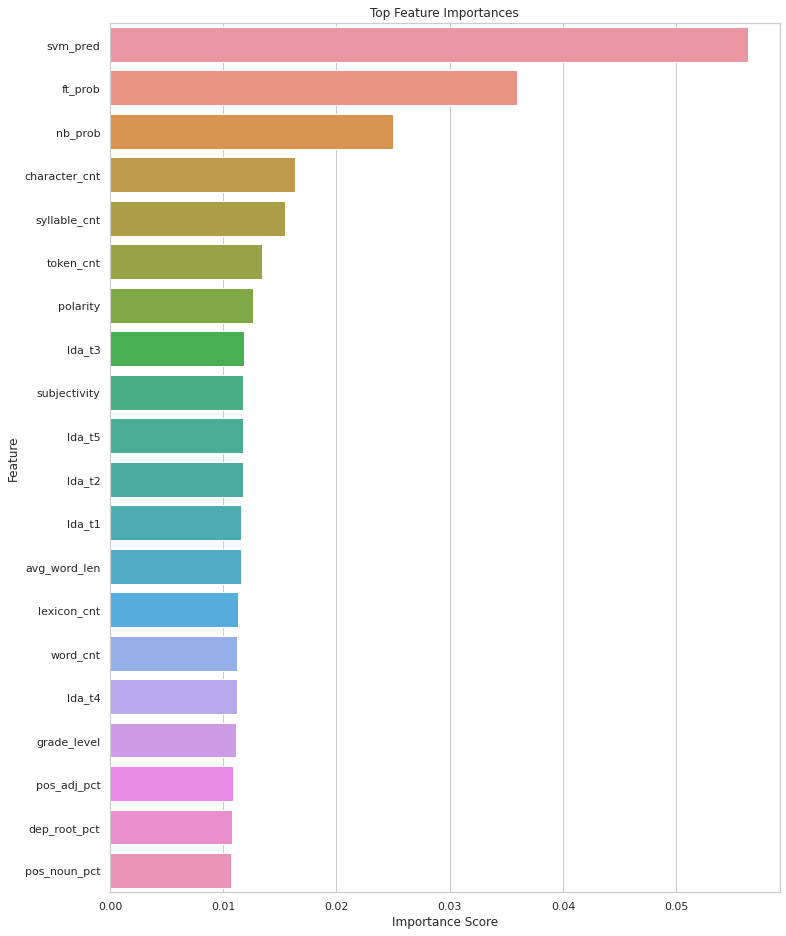

In [30]:
fig, ax = plt.subplots(figsize=(12,16))
sns.barplot(x=sorted_fi.iloc[:20].values, y=sorted_fi.iloc[:20].index, ax=ax)
ax.set_title("Top Feature Importances")
ax.set_ylabel("Feature")
ax.set_xlabel("Importance Score")

### Permutation Importances

In [31]:
# pi_process = permutation_importance(forest, X_train, y_train, n_jobs=-1)

In [32]:
# permutation_importances = pd.Series(pi_process.importances_mean, index=X_train.columns)
# permutation_importances

In [33]:
# sorted_pi = permutation_importances.sort_values(ascending=False)
# sorted_pi

In [34]:
# fig, ax = plt.subplots(figsize=(12,8))
# sns.barplot(x=sorted_pi.iloc[:10].values, y=sorted_pi.iloc[:10].index, ax=ax)
# ax.set_title("Top Permutation Importances")
# ax.set_ylabel("Feature")
# ax.set_xlabel("Importance Score")